# 梯度下降法（Gradient Descent）
求目标函数的最优值
## 1. 概述
* 不是一个机器学习算法
* 是一种基于搜索的最优化方法
* 作用：最小化一个损失函数
* 梯度上升法：最大化一个效用函数

### 1.1 示例图
* 每一个theta值都有一个函数J
![](../image/gd1-1.jpeg)
<center>1-1 梯度下降法</center>

### 1.2 η概述
* η成为学习率（learning rate)
* η的取值影响获得最优解的速度
* η取值不合适，甚至得不到最优解
* η是梯度下降法的一个超参数


#### η参数相关
* η太小，减慢收敛学习速度
![](../image/gd1-2.jpeg)
<center>1-2 η太小</center>
* η太大，甚至导致不收敛
![](../image/gd1-3.jpeg)
<center>1-3 η太大</center>


#### 注意事项
* 并不是所有函数都有唯一的极值点

![](../image/gd1-4.jpeg)
<center>1-4 局部最优解和全局最优解</center>
##### 解决方案：
* 多次运行，随机化初始点
* 梯度下降法的初始点也是一个超参数


### 案例
* 目标：使 $\sum_{i=1}^m({y}^{(i)} - \hat{y}^{(i)})^2$  尽可能小
* 线性回归法的损失函数具有唯一的最优解

## 2.模拟实现梯度下降法

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plot_x = np.linspace(-1, 6, 141)
plot_x

array([-1.  , -0.95, -0.9 , -0.85, -0.8 , -0.75, -0.7 , -0.65, -0.6 ,
       -0.55, -0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15,
       -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,
        0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,
        0.8 ,  0.85,  0.9 ,  0.95,  1.  ,  1.05,  1.1 ,  1.15,  1.2 ,
        1.25,  1.3 ,  1.35,  1.4 ,  1.45,  1.5 ,  1.55,  1.6 ,  1.65,
        1.7 ,  1.75,  1.8 ,  1.85,  1.9 ,  1.95,  2.  ,  2.05,  2.1 ,
        2.15,  2.2 ,  2.25,  2.3 ,  2.35,  2.4 ,  2.45,  2.5 ,  2.55,
        2.6 ,  2.65,  2.7 ,  2.75,  2.8 ,  2.85,  2.9 ,  2.95,  3.  ,
        3.05,  3.1 ,  3.15,  3.2 ,  3.25,  3.3 ,  3.35,  3.4 ,  3.45,
        3.5 ,  3.55,  3.6 ,  3.65,  3.7 ,  3.75,  3.8 ,  3.85,  3.9 ,
        3.95,  4.  ,  4.05,  4.1 ,  4.15,  4.2 ,  4.25,  4.3 ,  4.35,
        4.4 ,  4.45,  4.5 ,  4.55,  4.6 ,  4.65,  4.7 ,  4.75,  4.8 ,
        4.85,  4.9 ,  4.95,  5.  ,  5.05,  5.1 ,  5.15,  5.2 ,  5.25,
        5.3 ,  5.35,

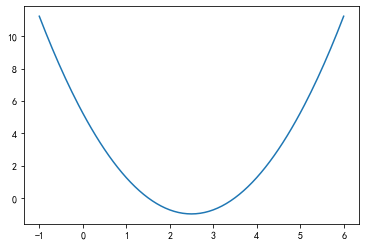

In [2]:
plot_y = (plot_x - 2.5)**2 - 1
plt.plot(plot_x, plot_y)
plt.show()

In [3]:
def dJ(theta):
    return 2 * (theta - 2.5)

def J(theta):
    try:
        return (theta - 2.5) ** 2 -1
    except:
        return float('inf')
    
def gradient_descent(initial_theta, eta,n_iters =1e4, epsilon = 1e-8):
    theta = initial_theta
    theta_history.append(initial_theta)
    i_iter = 0
    while i_iter < n_iters:
        gradient = dJ(theta)
        last_theta = theta
        
        theta = theta - eta * gradient
        theta_history.append(theta)
        
        if(abs(J(theta) - J(last_theta)) < epsilon):
            break
        i_iter += 1
            
            
def plot_theta_history():
    plt.plot(plot_x, J(plot_x))
    plt.plot(np.array(theta_history), J(np.array(theta_history)), color = 'r', marker='+')
    plt.show()

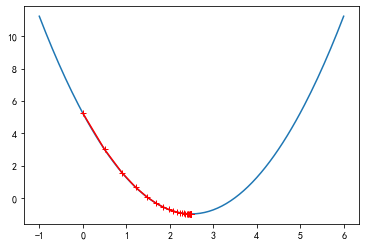

46

In [4]:
eta = 0.1
theta_history = []
gradient_descent(0, eta)
plot_theta_history()
len(theta_history)

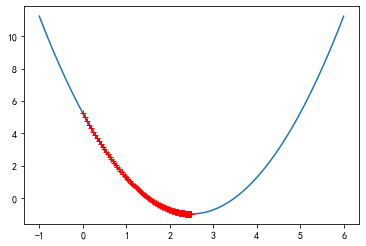

424

In [5]:
eta = 0.01 #η过小
theta_history = []
gradient_descent(0, eta)
plot_theta_history()
len(theta_history)

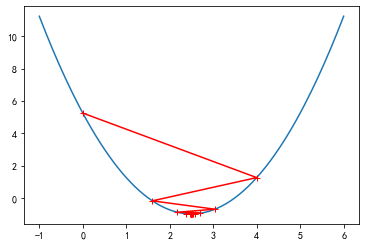

22

In [6]:
eta = 0.8
theta_history = []
gradient_descent(0, eta)
plot_theta_history()
len(theta_history)

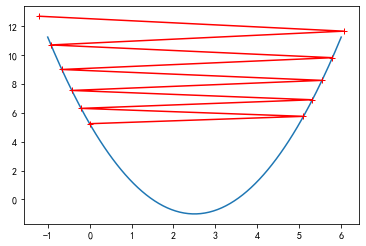

11

In [7]:
eta = 1.02 # η过大
theta_history = []
gradient_descent(0, eta, n_iters=10)
plot_theta_history()
len(theta_history)

### 2.1 线性回归中的梯度下降法
#### 2.1.1 概述
![](../image/gd1-5.jpeg)
<center>1-5 线性回归中的梯度下降法</center>


![](../image/gd1-6.jpeg)
<center>1-6 线性回归中的梯度下降图</center>

* 目标：使 $ \frac{1}{m}\sum_{i=1}^m({y}^{(i)} - \hat{y}^{(i)})^2$  尽可能小
* 公式：$ \hat{y}^{(i)}=θ_0 + θ_1x_1^{(i)} + θ_2x_2^{(i)} + ... + θ_nx_n^{(i)} $
* 目标：使 $ \frac{1}{m}\sum_{i=1}^m({y}^{(i)} - θ_0 - θ_1x_1^{(i)} - θ_2x_2^{(i)} - ... - θ_nx_n^{(i)})^2 $  尽可能小 


$$▽J(θ)= \frac{1}{m}
\left\{
 \begin{matrix}
   ∂J/∂θ_0 \\
   ∂J/∂θ_1 \\
   ∂J/∂θ_2 \\
   \vdots \\
   ∂J/∂θ_n
  \end{matrix} 
\right\}
= \frac{1}{m}
\left\{
 \begin{matrix}
   \sum_{i=1}^m2(y^{(i)} - {X_b}^{(i)}θ)·(-1) \\
   \sum_{i=1}^m2(y^{(i)} - {X_b}^{(i)}θ)·(-{X_1}^{(i)}) \\
   \sum_{i=1}^m2(y^{(i)} - {X_b}^{(i)}θ)·(-{X_2}^{(i)}) \\
   \vdots \\
   \sum_{i=1}^m2(y^{(i)} - {X_b}^{(i)}θ)·(-{X_n}^{(i)})
  \end{matrix} 
\right\}
= \frac{2}{m}·
\left\{
 \begin{matrix}
   \sum_{i=1}^m({X_b}^{(i)}θ - y^{(i)}) \\
   \sum_{i=1}^m({X_b}^{(i)}θ - y^{(i)})·{X_1}^{(i)} \\
   \sum_{i=1}^m({X_b}^{(i)}θ - y^{(i)})·{X_2}^{(i)} \\
   \vdots \\
   \sum_{i=1}^m({X_b}^{(i)}θ - y^{(i)})·{X_n}^{(i)}
  \end{matrix} 
\right\}
$$

* 式子简化：$ J(θ)=MSE(y,\hat{y}) $ ,有时取 \frac{1}{2m}\sum_{i=1}^m({y}^{(i)} - \hat{y}^{(i)})^2

#### 2.1.2 案例

(100, 1)
(100,)


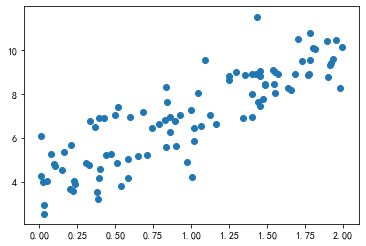

In [8]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
x = 2 * np.random.random(size=100)
y = x * 3. + 4. + np.random.normal(size=100)
X = x.reshape(-1, 1)

print(X.shape)
print(y.shape)
plt.scatter(x, y)
plt.show()

##### 使用梯度下降法训练
* 目标：使 $ \frac{1}{m}\sum_{i=1}^m({y}^{(i)} - \hat{y}^{(i)})^2$  尽可能小

$$ J(θ)=MSE(y,\hat{y}) \quad  ▽J(θ)= \frac{1}{m}
\left\{
 \begin{matrix}
   ∂J/∂θ_0 \\
   ∂J/∂θ_1 \\
   ∂J/∂θ_2 \\
   \vdots \\
   ∂J/∂θ_n
  \end{matrix} 
\right\}
= \frac{2}{m}·
\left\{
 \begin{matrix}
   \sum_{i=1}^m({X_b}^{(i)}θ - y^{(i)}) \\
   \sum_{i=1}^m({X_b}^{(i)}θ - y^{(i)})·{X_1}^{(i)} \\
   \sum_{i=1}^m({X_b}^{(i)}θ - y^{(i)})·{X_2}^{(i)} \\
   \vdots \\
   \sum_{i=1}^m({X_b}^{(i)}θ - y^{(i)})·{X_n}^{(i)}
  \end{matrix} 
\right\}
$$

In [9]:
def J_lr(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / len(X_b)
    except:
        return float('inf')
    
def dJ_lr(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1,len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
    return res * 2 / len(X_b)

def gradient_descent_lr(X_b, y, initial_theta, eta,n_iters =1e4, epsilon = 1e-8):
    theta = initial_theta
    i_iter = 0
    while i_iter < n_iters:
        gradient = dJ_lr(theta, X_b, y)
        last_theta = theta
        
        theta = theta - eta * gradient
        
        if(abs(J_lr(theta, X_b, y) - J_lr(last_theta, X_b, y)) < epsilon):
            break
        i_iter += 1
    return theta

X_b = np.hstack([np.ones((len(x), 1)), x.reshape(-1, 1)])

initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

theta = gradient_descent_lr(X_b,y,initial_theta,eta)

theta

array([4.02145786, 3.00706277])

### 2.2 下降法示例

$$
= \frac{2}{m}·
\left\{
 \begin{matrix}
   \sum_{i=1}^m({X_b}^{(i)}θ - y^{(i)}) \\
   \sum_{i=1}^m({X_b}^{(i)}θ - y^{(i)})·{X_1}^{(i)} \\
   \sum_{i=1}^m({X_b}^{(i)}θ - y^{(i)})·{X_2}^{(i)} \\
   \vdots \\
   \sum_{i=1}^m({X_b}^{(i)}θ - y^{(i)})·{X_n}^{(i)}
  \end{matrix} 
\right\}
= \frac{2}{m}·({X_b}^{(1)}θ - y^{(1)}, {X_b}^{(2)}θ - y^{(2)}, {X_b}^{(3)}θ - y^{(3)}, \ldots {X_b}^{(1)}θ - y^{(1)})
·\left\{
 \begin{matrix}
    {X_0}^{(1)} & {X_1}^{(1)} & {X_2}^{(1)} \ldots {X_n}^{(1)} \\
    {X_0}^{(2)} & {X_1}^{(2)} & {X_2}^{(2)} \ldots {X_n}^{(2)} \\
    {X_0}^{(3)} & {X_1}^{(3)} & {X_2}^{(3)} \ldots {X_n}^{(3)} \\
   \vdots & \vdots & \vdots \ldots \vdots \\
     {X_0}^{(m)} & {X_1}^{(m)} & {X_2}^{(m)} \ldots {X_n}^{(m)}
  \end{matrix} 
\right\}
=\frac{2}{m}·(X_bθ - y)^T.X_b
=\frac{2}{m}.{X_b}^T·(X_bθ - y)
$$
#### 2.2.1 使用原始方案

In [10]:
import numpy as np
from sklearn import datasets

boston = datasets.load_boston()
X = boston.data
y = boston.target

X = X[y < 50.0]
y = y[y < 50.0]

In [11]:
%run linear_regression.py
%run model_selection.py

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, seed = 666)

In [13]:
from linear_regression import LinearRegression


lin_reg1 = LinearRegression()
%time lin_reg1.fit_normal(X_train, y_train)
lin_reg1.score(X_test, y_test)

CPU times: user 242 µs, sys: 54 µs, total: 296 µs
Wall time: 231 µs


0.8129794056212925

#### 2.2.2 使用梯度下降法

In [14]:
lin_reg2 = LinearRegression()
%time lin_reg2.fit_gd(X_train, y_train, eta = 0.000001, n_iters=1e6)

CPU times: user 35 s, sys: 450 ms, total: 35.5 s
Wall time: 38.1 s


LinearRegression()

In [15]:
lin_reg2.coef_

array([-1.07889200e-01,  5.91494760e-02, -5.72920411e-02,  1.19334353e-01,
        2.07223623e-01,  3.91254775e+00,  1.50564949e-03, -5.36511902e-01,
        1.13424276e-01, -9.76209406e-03,  5.35544815e-02,  1.58440412e-02,
       -3.78786162e-01])

In [16]:
lin_reg2.score(X_test, y_test)

0.7542932581943915

##### 梯度下降法与数据归一化
* 使用提督下降法前，最好进行数据归一化
![](../image/gd1-7.jpeg)

In [17]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(X_train)

X_train_standard = standardScaler.transform(X_train)

In [18]:
lin_reg3 = LinearRegression()
%time lin_reg3.fit_gd(X_train_standard, y_train)

CPU times: user 156 ms, sys: 3.34 ms, total: 160 ms
Wall time: 181 ms


LinearRegression()

In [19]:
X_test_standard = standardScaler.transform(X_test)

In [20]:
lin_reg3.score(X_test_standard, y_test)

0.8129873310487505

##### 梯度下降法的优势

In [21]:
m = 1000
n = 5000

big_X = np.random.normal(size = (m, n))
true_theta = np.random.uniform(0.0, 1000.0, size = n+1)
big_y = big_X.dot(true_theta[1:]) + true_theta[0] + np.random.normal(0., 10., size=m)

In [22]:
big_reg1 = LinearRegression()

%time big_reg1.fit_normal(big_X, big_y)

CPU times: user 13.1 s, sys: 516 ms, total: 13.6 s
Wall time: 8.92 s


LinearRegression()

In [23]:
big_reg2 = LinearRegression()

%time big_reg2.fit_gd(big_X, big_y)

CPU times: user 5.15 s, sys: 118 ms, total: 5.27 s
Wall time: 4.13 s


LinearRegression()

## 3.批量梯度下降法Batch Gradient Descent

### 3.1 概念
$$
▽J(θ)= \frac{2}{m}·
\left\{
 \begin{matrix}
   \sum_{i=1}^m({X_b}^{(i)}θ - y^{(i)}) \\
   \sum_{i=1}^m({X_b}^{(i)}θ - y^{(i)})·{X_1}^{(i)} \\
   \sum_{i=1}^m({X_b}^{(i)}θ - y^{(i)})·{X_2}^{(i)} \\
   \vdots \\
   \sum_{i=1}^m({X_b}^{(i)}θ - y^{(i)})·{X_n}^{(i)}
  \end{matrix} 
\right\}
=\frac{2}{m}.{X_b}^T·(X_bθ - y)
$$

### 随机梯度下降法Stochastic Gradient Descent

$$
\frac{2}{m}·
\left\{
 \begin{matrix}
   \sum_{i=1}^m({X_b}^{(i)}θ - y^{(i)}) \\
   \sum_{i=1}^m({X_b}^{(i)}θ - y^{(i)})·{X_1}^{(i)} \\
   \sum_{i=1}^m({X_b}^{(i)}θ - y^{(i)})·{X_2}^{(i)} \\
   \vdots \\
   \sum_{i=1}^m({X_b}^{(i)}θ - y^{(i)})·{X_n}^{(i)}
  \end{matrix} 
\right\}  \quad 
2·
\left\{
 \begin{matrix}
   ({X_b}^{(i)}θ - y^{(i)}) \\
   ({X_b}^{(i)}θ - y^{(i)})·{X_1}^{(i)} \\
   ({X_b}^{(i)}θ - y^{(i)})·{X_2}^{(i)} \\
   \vdots \\
   ({X_b}^{(i)}θ - y^{(i)})·{X_n}^{(i)}
  \end{matrix} 
\right\}
=2·（{X_b}^{(i)}）^T·(X_b^{(i)}θ - y^{(i)})
$$ 

![](../image/gd1-8.jpeg)

模拟退火的思想

### 3.2 示例

In [24]:
import numpy as np
import matplotlib.pyplot as plt

m = 100000

x = np.random.normal(size=m)
X = x.reshape(-1, 1)
y = 4. * x + 3. + np.random.normal(0, 3, size = m)

def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / len(X_b)
    except:
        return float('inf')
    
def dJ(theta, X_b, y):
    return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(y)

def gradient_descent(X_b, y, initial_theta, eta,n_iters =1e4, epsilon = 1e-8):
    theta = initial_theta
    cur_iter = 0
    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        
        theta = theta - eta * gradient
        
        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
        cur_iter += 1
    return theta

In [25]:
%%time
X_b = np.hstack([np.ones((len(X),1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01
theta = gradient_descent(X_b, y, initial_theta, eta)

CPU times: user 772 ms, sys: 51.5 ms, total: 824 ms
Wall time: 634 ms


In [26]:
theta

array([2.99265616, 4.01188401])

In [27]:
def dJ_sgd(theta, X_b_i, y_i):
    return X_b_i.T.dot(X_b_i.dot(theta) - y_i) * 2.

def sgd(X_b, y, initial_theta, n_iters =1e4, epsilon = 1e-8):
    t0 = 5
    t1 = 50
    def learning_rate(t):
        return t0 / (t + t1)
    
    theta = initial_theta
    
    for cur_iter in range(n_iters):
        rand_i = np.random.randint(len(X_b))
        gradient = dJ_sgd(theta, X_b[rand_i], y[rand_i])
        theta = theta - learning_rate(cur_iter) * gradient
        
    return theta

In [28]:
%%time
X_b = np.hstack([np.ones((len(X),1)), X])
initial_theta = np.zeros(X_b.shape[1])
theta = sgd(X_b, y, initial_theta, n_iters=len(X_b) // 3)

CPU times: user 550 ms, sys: 11 ms, total: 561 ms
Wall time: 684 ms


In [29]:
theta

array([2.9633152 , 3.98778654])

In [30]:
%run linear_regression.py
%run model_selection.py

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
m = 100000

x = np.random.normal(size=m)
X = x.reshape(-1, 1)
y = 4. * x + 3. + np.random.normal(0, 3, size = m)

In [33]:
from linear_regression import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit_sgd(X, y, n_iters=2)

LinearRegression()

In [34]:
lin_reg.coef_

array([3.99781731])

In [35]:
lin_reg.intercept_

2.969298731663039

### 3.3真实使用我们自己的SGD

In [36]:
from sklearn import datasets

boston = datasets.load_boston()
X = boston.data
y = boston.target

X = X[y < 50.0]
y = y[y < 50.0]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, seed = 666)

from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(X_train)

X_train_standard = standardScaler.transform(X_train)
X_test_standard = standardScaler.transform(X_test)

lin_reg2 = LinearRegression()

%time lin_reg2.fit_sgd(X_train_standard, y_train, n_iters = 2)
lin_reg2.score(X_test_standard, y_test)

CPU times: user 5.17 ms, sys: 607 µs, total: 5.78 ms
Wall time: 6.62 ms


0.7857275413602651

In [38]:
%time lin_reg2.fit_sgd(X_train_standard, y_train, n_iters = 100)
lin_reg2.score(X_test_standard, y_test)

CPU times: user 209 ms, sys: 9.24 ms, total: 218 ms
Wall time: 241 ms


0.8118448300944716

### 3.4 scikit-learn中的SGD

In [39]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor()

%time sgd_reg.fit(X_train_standard, y_train)

sgd_reg.score(X_test_standard, y_test)

CPU times: user 1.87 ms, sys: 125 µs, total: 1.99 ms
Wall time: 2.07 ms


0.8129396246300761

In [40]:
sgd_reg = SGDRegressor(max_iter=100)

%time sgd_reg.fit(X_train_standard, y_train)

sgd_reg.score(X_test_standard, y_test)

CPU times: user 1.93 ms, sys: 973 µs, total: 2.9 ms
Wall time: 3.17 ms


0.8117466504621668

## 4关于梯度的调试

![](../image/gd1-9.jpeg)

In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
np.random.seed(666)
X = np.random.random(size = (1000, 10))

In [43]:
true_theta = np.arange(1, 12, dtype = float)

In [44]:
X_b = np.hstack([np.ones((len(X), 1)), X])
y = X_b.dot(true_theta) + np.random.normal(size=1000)

In [45]:
X.shape

(1000, 10)

In [46]:
y.shape

(1000,)

In [47]:
true_theta

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [48]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / len(X_b)
    except:
        return float('inf')
    
    
def dJ_math(theta, X_b, y):
    return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(y)

def dJ_debug(theta, X_b, y, epsilon=0.01):
    res = np.empty(len(theta))
    for i in range(len(theta)):
        theta_1 = theta.copy()
        theta_1[i] += epsilon
        theta_2 = theta.copy()
        theta_2[i] -= epsilon
        res[i] = (J(theta_1, X_b, y), J(theta_2, X_b, y)) / (2 * epsilon)
    return res


def dJ(theta, X_b, y):
    return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(y)

def gradient_descent(dJ, X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):
    theta = initial_theta
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
            
        cur_iter += 1
    return theta

In [49]:
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

%time theta = gradient_descent(dJ_debug, X_b, y, initial_theta, eta)
theta

TypeError: unsupported operand type(s) for /: 'tuple' and 'float'

array([2.9633152 , 3.98778654])

### 5.梯度下降法讨论
* 批量梯度下降法 Batch Gradient Descent
* 随机梯度下降法 Stochastic Gradient Descent
* 小批量梯度下降法Mini-Batch Gradient Descent

##### 5.1 随机
* 跳出局部最优解
* 更快的运行速度
* 机器学习领域很多算法都要使用随机的特点：随机搜索；随机森林